In [29]:
!pip install lazypredict

  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 593.1 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 475.0 kB/s eta 0:00:00 kB/s eta 0:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 613.0 kB/s eta 0:00:001m602.5 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 596.6 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 612.9 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 631.9 kB/s eta 0:00:001m634.6 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 636.3 kB/s eta 0:00:001m635.1 kB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.25;237m━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# Load common libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('heart.csv')

# Display basic info
print(df.info())  # Check column types and missing values
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160

In [3]:
# For ML purposes, all strings are converted to int
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})
df['ChestPainType'] = df['ChestPainType'].replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
df['RestingECG'] = df['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].replace({'Up': 0, 'Down': 1, 'Flat': 2})
print(df.head())
# IGNORE WARNING

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              0        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              0        130          283          0           1   
3   48    1              2        138          214          0           0   
4   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         2             1  
2     98               0      0.0         0             0  
3    108               1      1.5         2             1  
4    122               0      0.0         0             0  


In [11]:
# Split genders
male_df = df[df['Sex'] == 0]
female_df = df[df['Sex'] == 1]

male = male_df.drop(columns=['Sex'])
female = female_df.drop(columns=['Sex'])


In [12]:
# Library needed
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X_male = male.drop("HeartDisease", axis=1)
y_male = male["HeartDisease"]

X_female = female.drop("HeartDisease", axis=1)
y_female = female["HeartDisease"]

# Split the dataset into training and testing sets (80%-20%)
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(
    X_male, y_male, test_size=0.2, random_state=42
)

X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(
    X_female, y_female, test_size=0.2, random_state=42
)


In [16]:
# Library needed
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_male_train_scaled = scaler.fit_transform(X_male_train)
X_male_test_scaled = scaler.transform(X_male_test)

X_female_train_scaled = scaler.fit_transform(X_female_train)
X_female_test_scaled = scaler.transform(X_female_test)

In [21]:
# Library needed
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
model_male = RandomForestClassifier(n_estimators=100, random_state=42)
model_male.fit(X_male_train_scaled, y_male_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
model_female = RandomForestClassifier(n_estimators=100, random_state=42)
model_female.fit(X_female_train_scaled, y_female_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# Make predictions
y_male_pred = model_male.predict(X_male_test_scaled)
y_female_pred = model_female.predict(X_female_test_scaled)

In [27]:
# Library needed
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model (male)
accuracy_male = accuracy_score(y_male_test, y_male_pred)
print(f"Model Accuracy: {accuracy_male:.4f}")

print("\nClassification Report:")
print(classification_report(y_male_test, y_male_pred))

Model Accuracy: 0.8759

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        49
           1       0.90      0.92      0.91        96

    accuracy                           0.88       145
   macro avg       0.86      0.86      0.86       145
weighted avg       0.87      0.88      0.88       145



In [28]:
# Evaluate the model
accuracy_female = accuracy_score(y_female_test, y_female_pred)
print(f"Model Accuracy: {accuracy_female:.4f}")

print("\nClassification Report:")
print(classification_report(y_female_test, y_female_pred))

Model Accuracy: 0.8974

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.67      0.86      0.75         7

    accuracy                           0.90        39
   macro avg       0.82      0.88      0.84        39
weighted avg       0.91      0.90      0.90        39



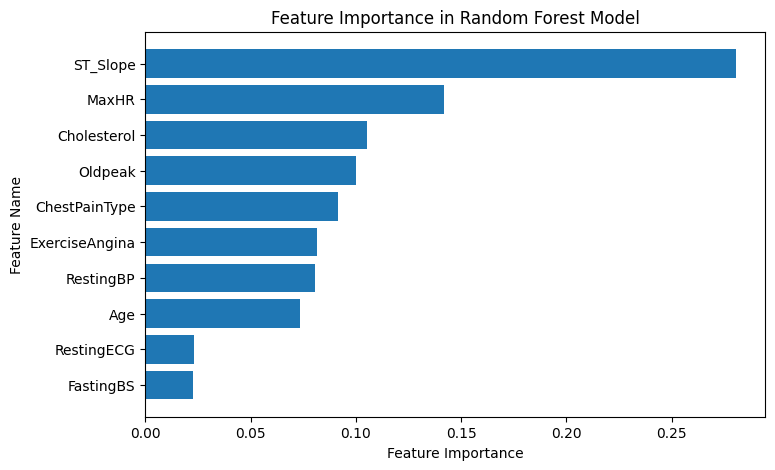

In [87]:
# Get feature importance from the trained model
feature_importances = model_male.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_male.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('male_importance.png') 
plt.show()

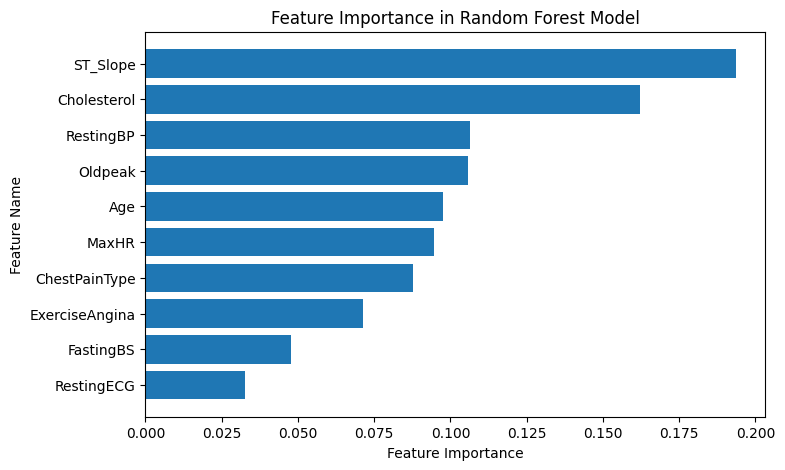

In [88]:
# Get feature importance from the trained model
feature_importances = model_female.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_female.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('female_importance.png') 

plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# -------------------------
# 1. Hyperparameter grid
# -------------------------
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20, 30],     # Tree depth
    'min_samples_split': [2, 5, 10],     # Min samples to split
    'min_samples_leaf': [1, 2, 4]        # Min samples in leaf
}

# -------------------------
# 2. MALE GRID SEARCH
# -------------------------
rf_male = RandomForestClassifier(random_state=42)

grid_search_male = GridSearchCV(
    rf_male,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_male.fit(X_male_train, y_male_train)

print("Best hyperparameters (male):", grid_search_male.best_params_)

best_model_male = grid_search_male.best_estimator_

y_pred_male_opt = best_model_male.predict(X_male_test)
male_opt_acc = accuracy_score(y_male_test, y_pred_male_opt)

print("Optimized male model accuracy:", male_opt_acc)

# -------------------------
# 3. FEMALE GRID SEARCH
# -------------------------
rf_female = RandomForestClassifier(random_state=42)

grid_search_female = GridSearchCV(
    rf_female,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search_female.fit(X_female_train, y_female_train)

print("Best hyperparameters (female):", grid_search_female.best_params_)

best_model_female = grid_search_female.best_estimator_

y_pred_female_opt = best_model_female.predict(X_female_test)
female_opt_acc = accuracy_score(y_female_test, y_pred_female_opt)

print("Optimized female model accuracy:", female_opt_acc)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters (male): {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Optimized male model accuracy: 0.8689655172413793
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters (female): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Optimized female model accuracy: 0.9487179487179487


In [35]:
import joblib

# Save optimized Random Forest models
joblib.dump(best_model_male, "rf_male_optimized.pkl")
joblib.dump(best_model_female, "rf_female_optimized.pkl")

print("Optimized male and female Random Forest models saved successfully!")


Optimized male and female Random Forest models saved successfully!


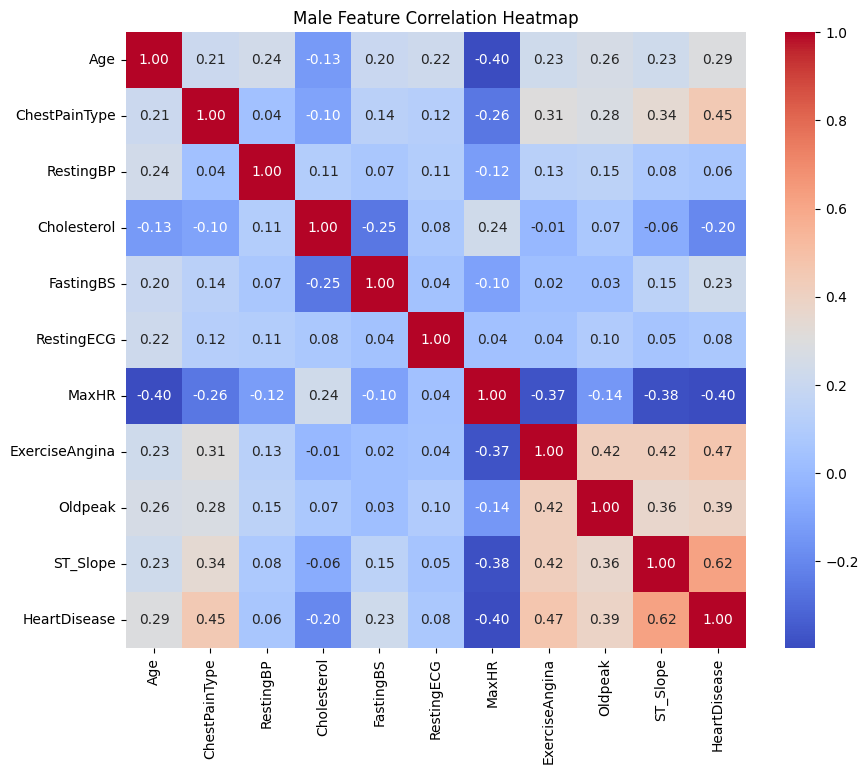

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(
    male.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)
plt.title("Male Feature Correlation Heatmap")
plt.savefig('male_heatmap.png') 

plt.show()


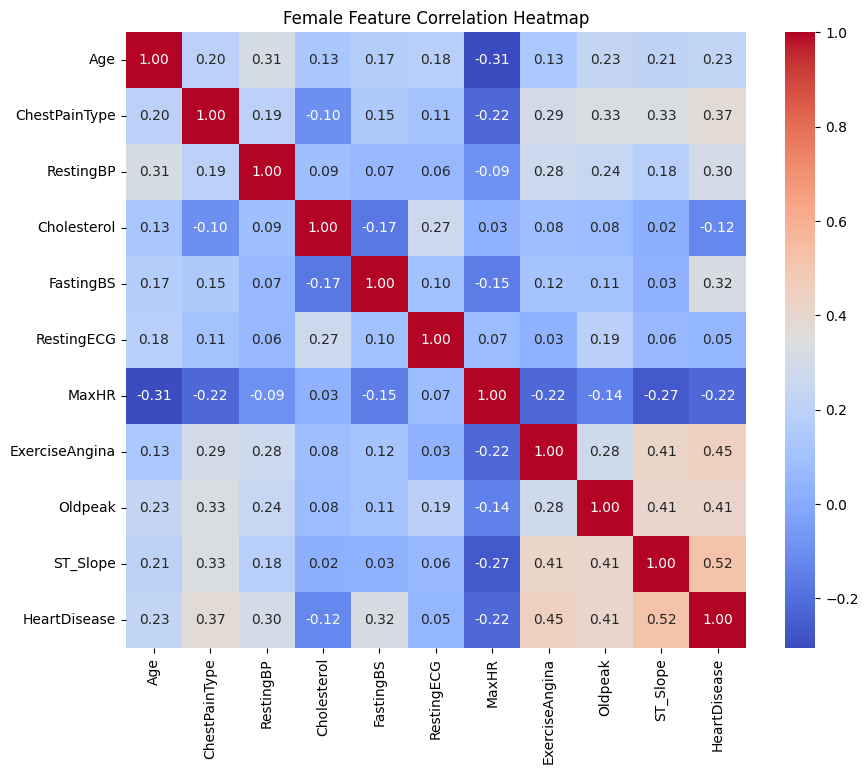

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(
    female.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)
plt.title("Female Feature Correlation Heatmap")
plt.savefig('female_heatmap.png') 

plt.show()


In [30]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models.head(10)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553134 -> initscore=0.213340
[LightGBM] [Info] Start training from score 0.213340
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.92,0.92,0.92,0.92,0.00
QuadraticDiscriminantAnalysis,0.92,0.91,0.91,0.92,0.01
LogisticRegression,0.90,0.90,0.90,0.90,0.01
ExtraTreesClassifier,0.90,0.90,0.90,0.90,0.06
LinearSVC,0.90,0.89,0.89,0.90,0.02
CalibratedClassifierCV,0.90,0.89,0.89,0.90,0.02
KNeighborsClassifier,0.90,0.89,0.89,0.90,0.01
NearestCentroid,0.89,0.89,0.89,0.89,0.00
NuSVC,0.90,0.89,0.89,0.90,0.01


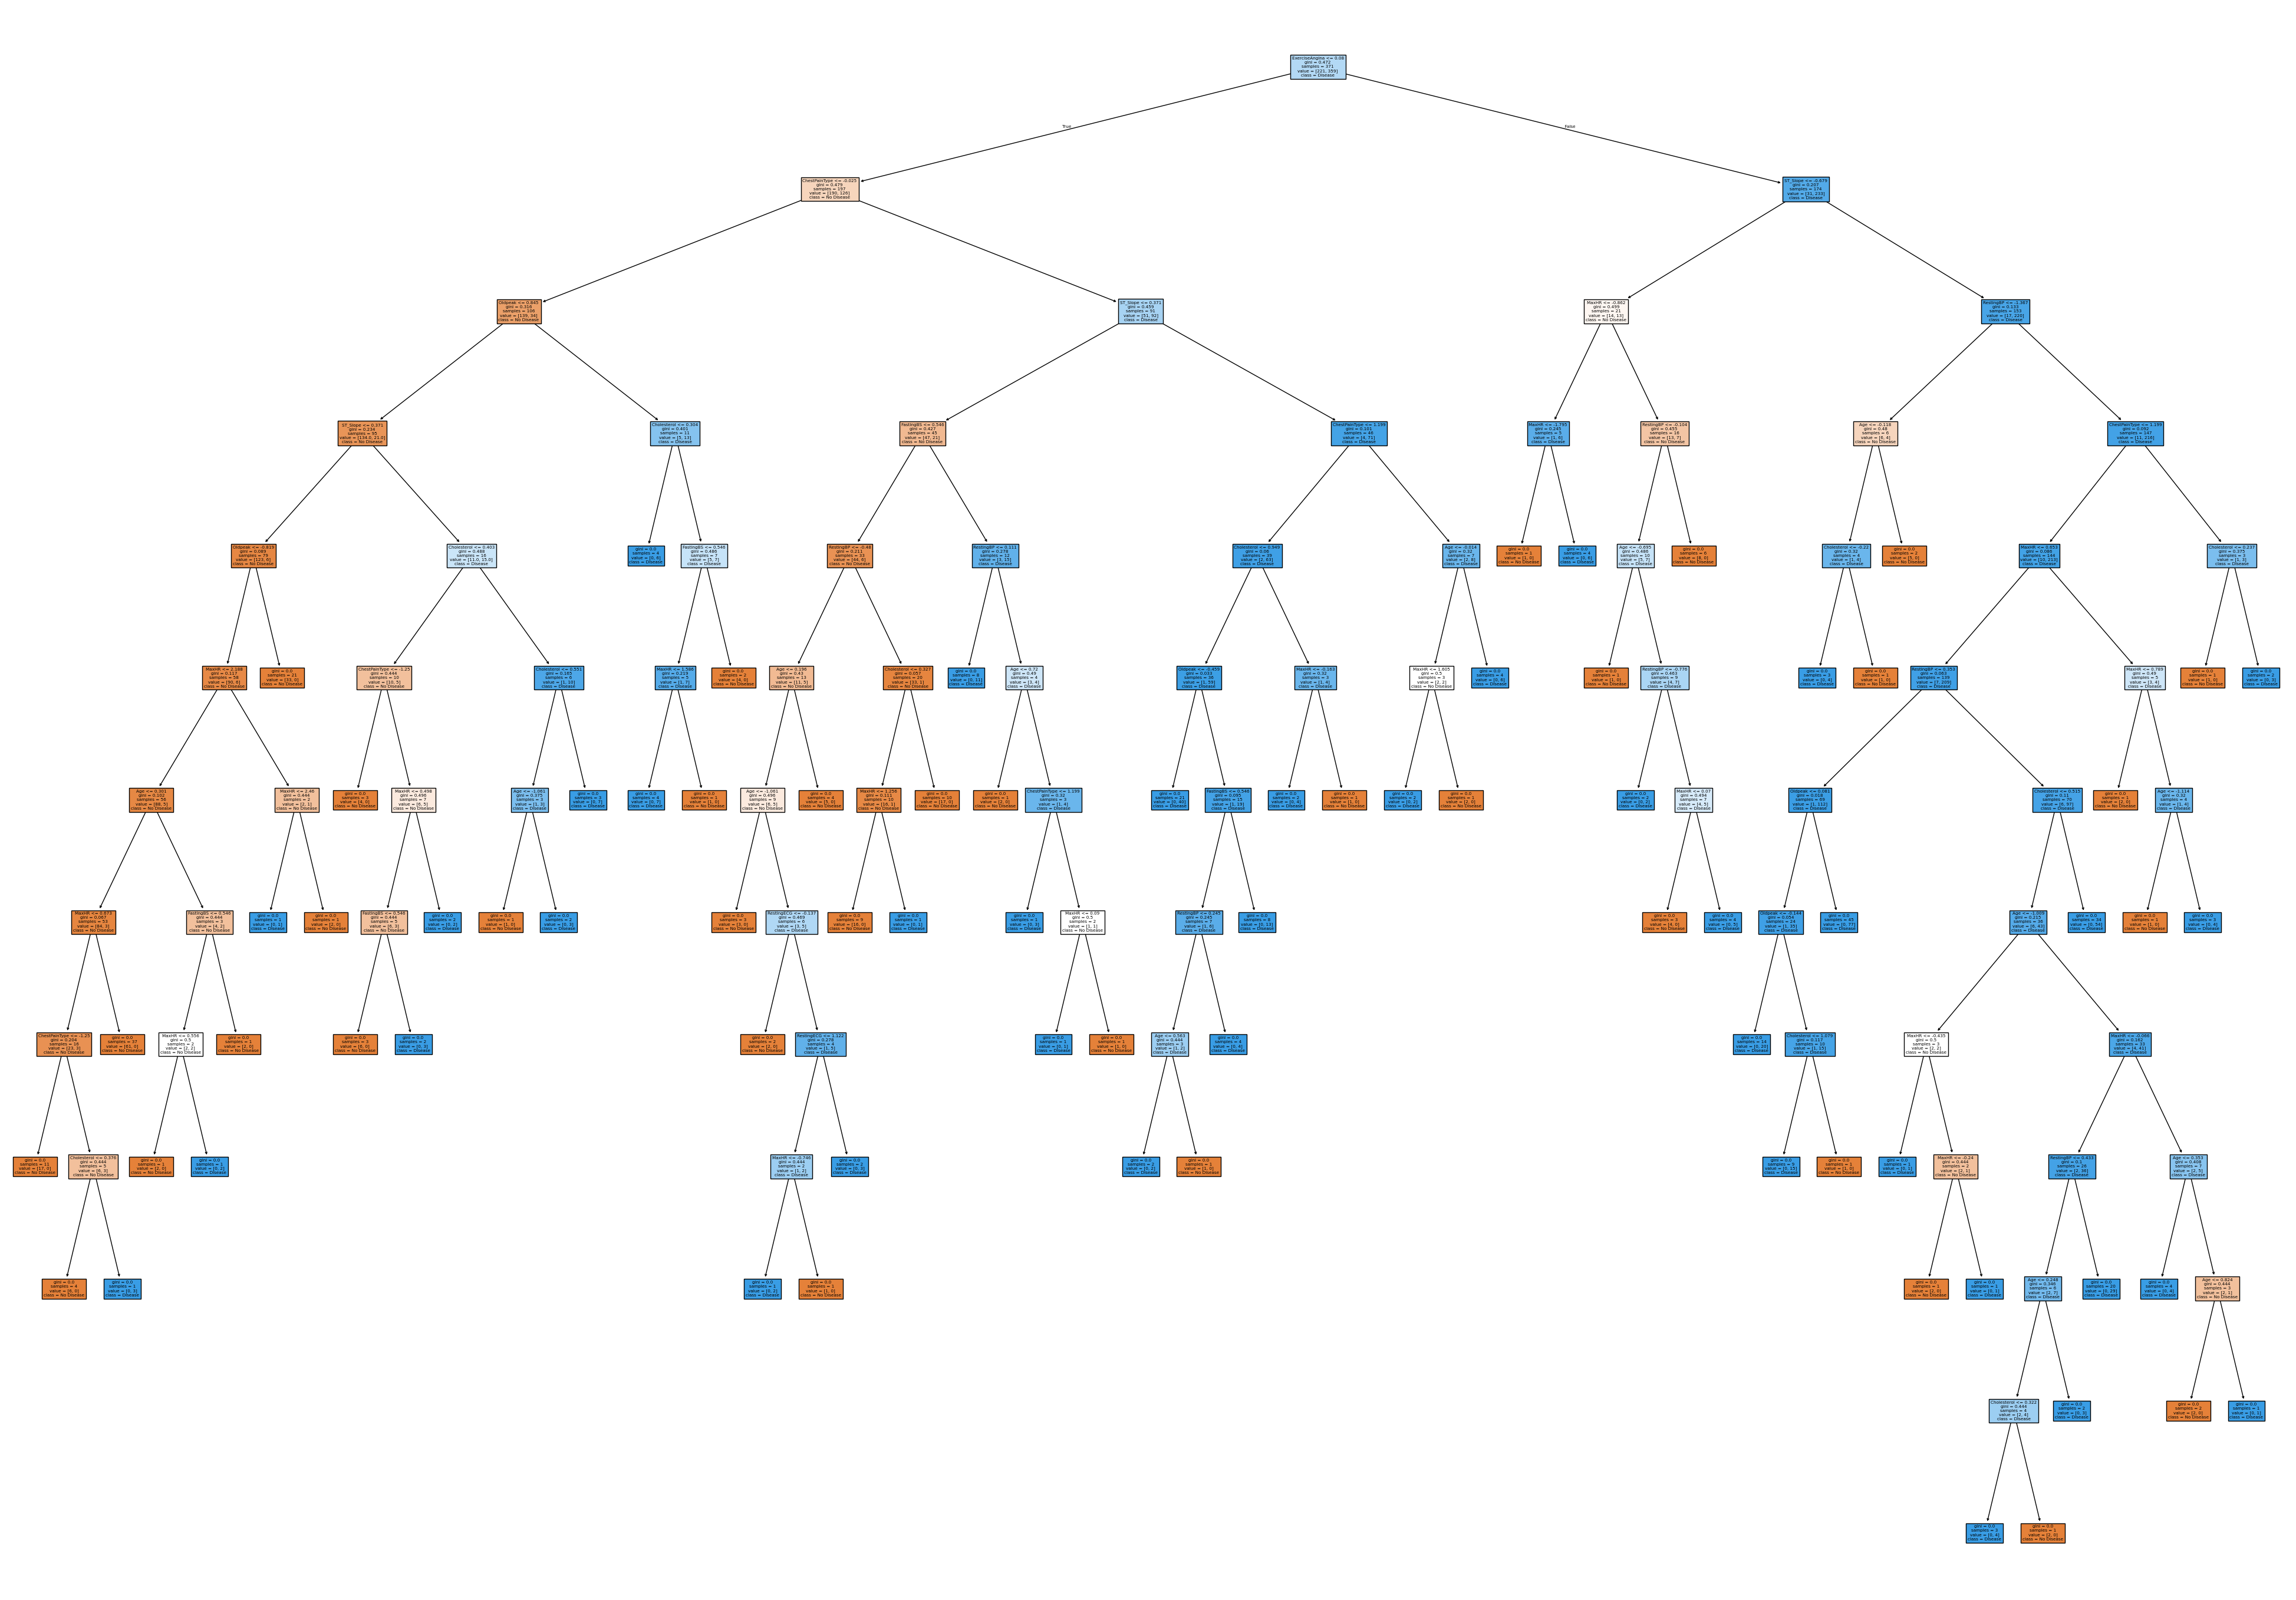

In [83]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,35))
plot_tree(
    model_male.estimators_[0],
    feature_names=X_male.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    max_depth=111
)
plt.savefig('male.png') 

plt.show()


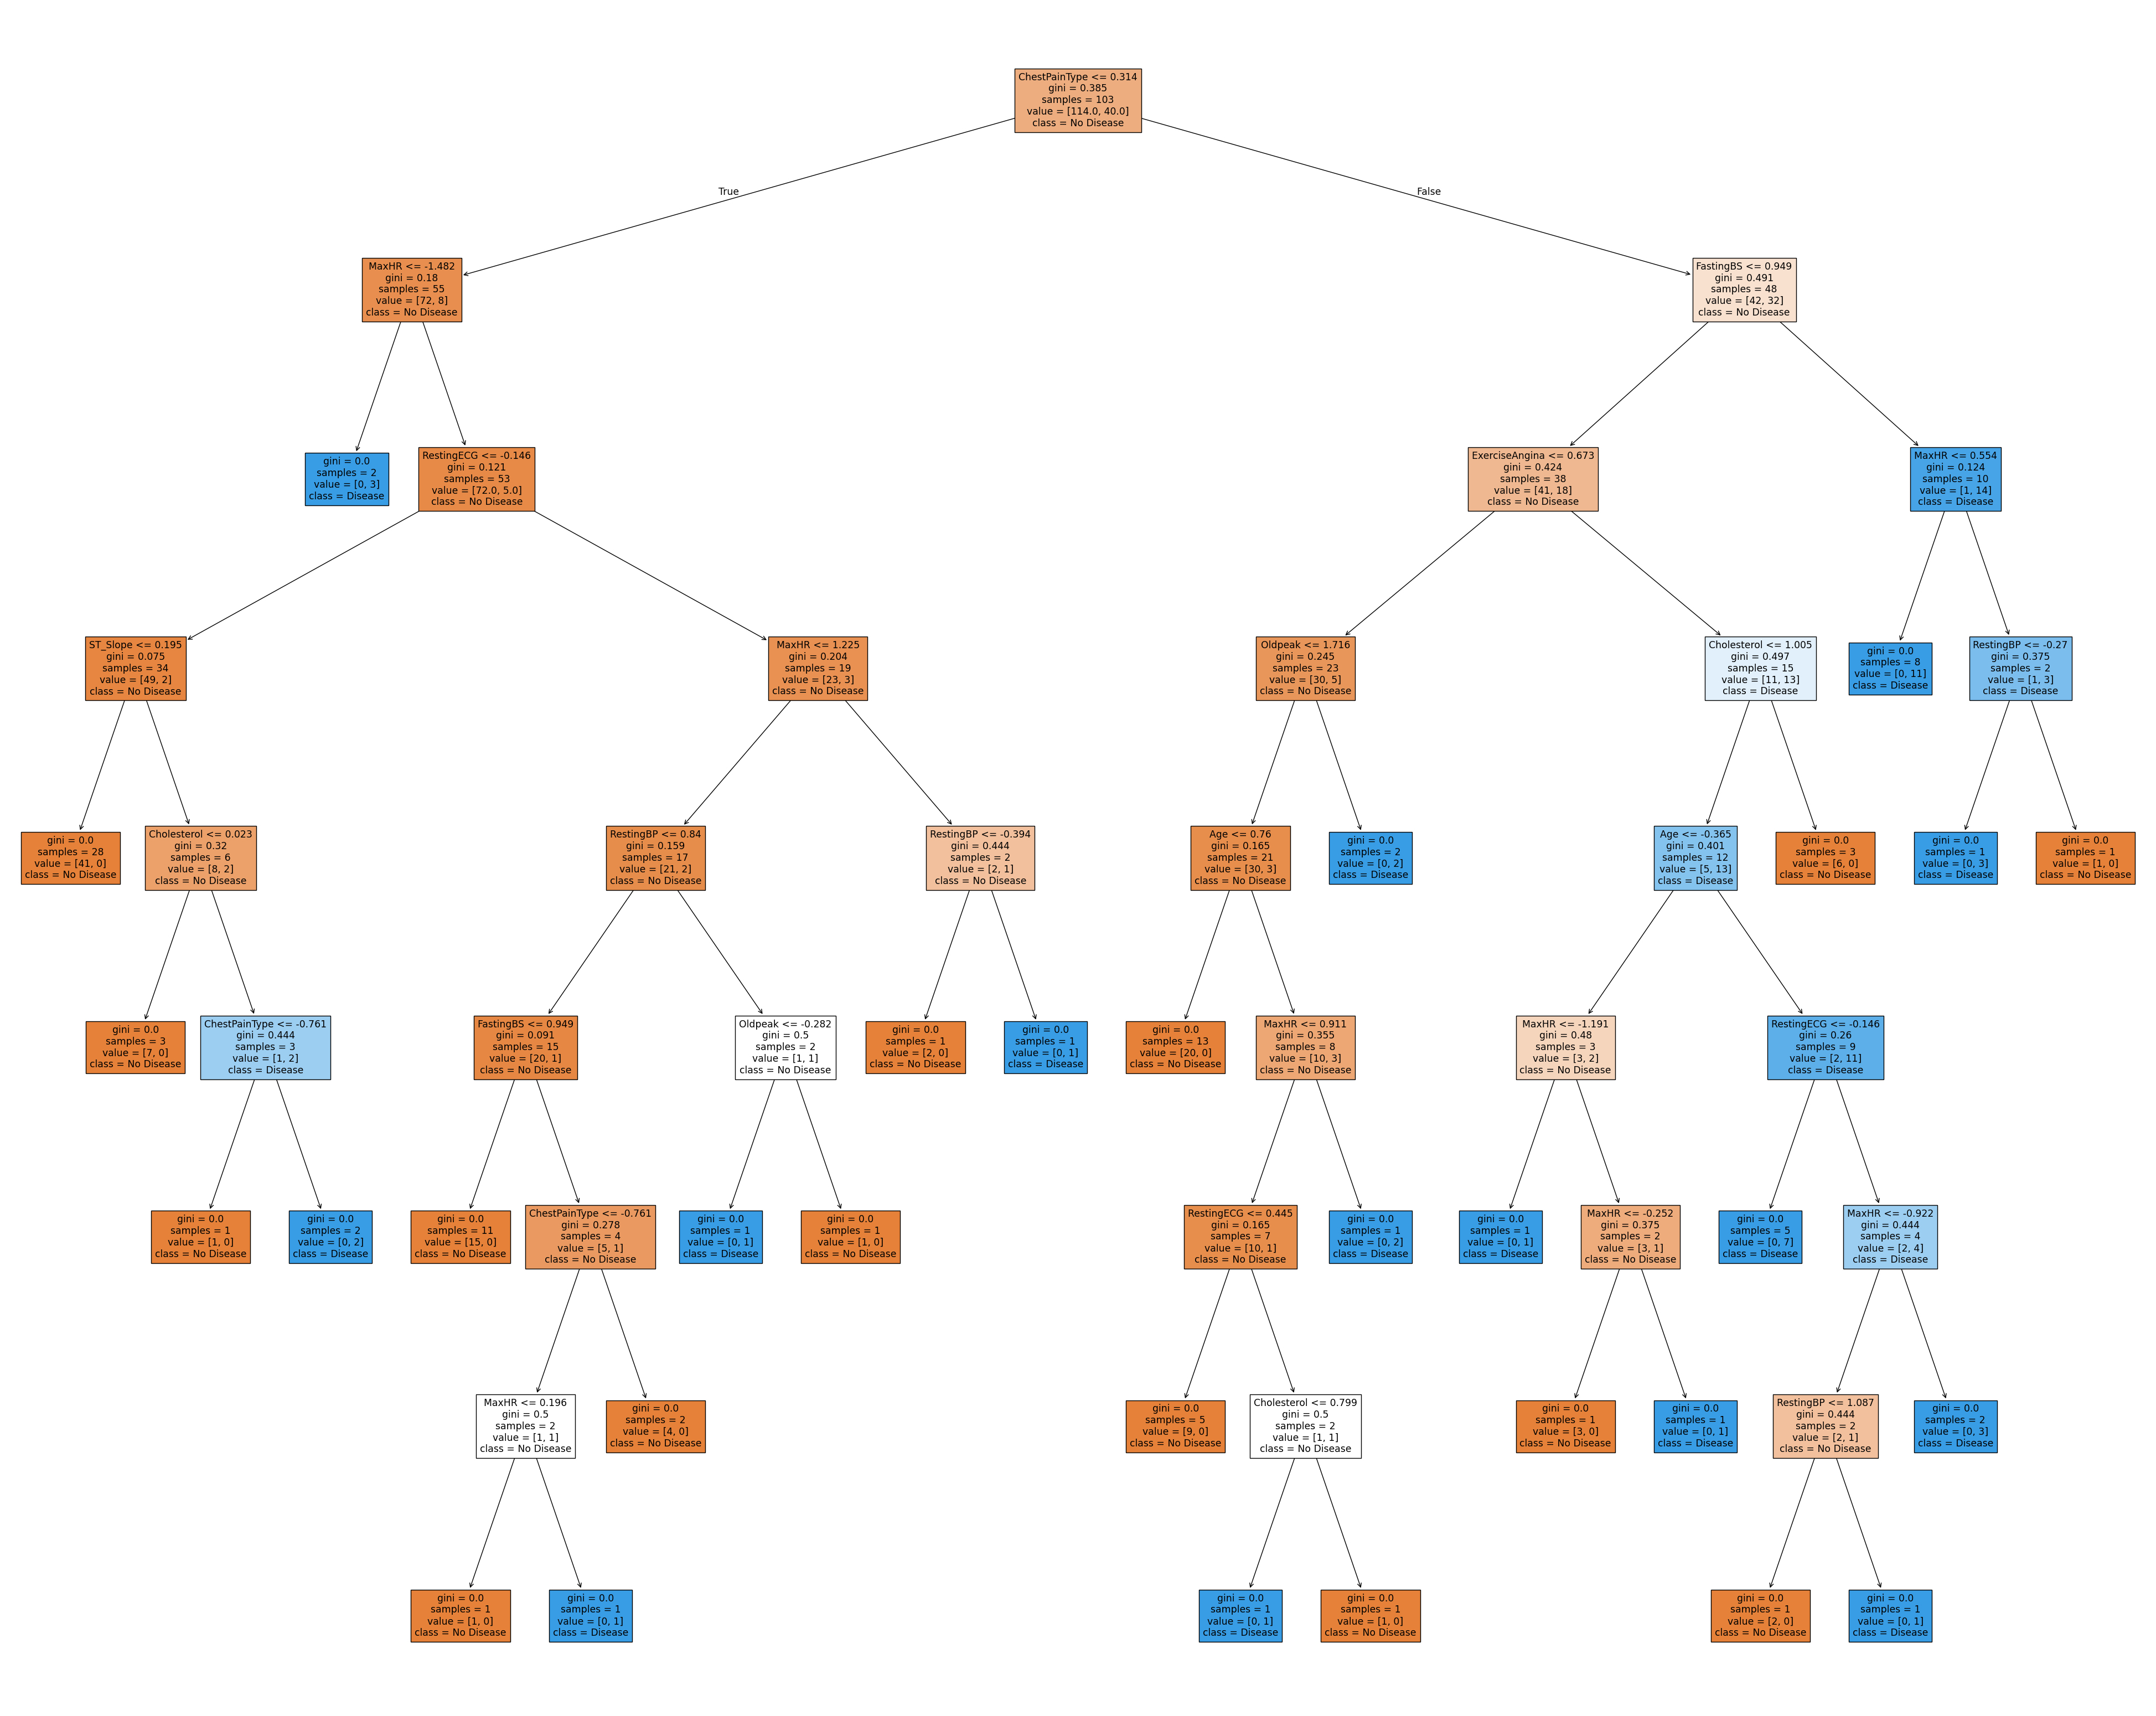

In [84]:
plt.figure(figsize=(50,40))
plot_tree(
    model_female.estimators_[0],
    feature_names=X_female.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    max_depth=8
)
plt.savefig('female.png') 
plt.show()
